In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("C:/Users/uttam/Box Sync/Internship/Bengaluru Project/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

# Data Prep and Cleaning

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1= df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns') # these columns does not affect the prediction of price much

In [6]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2 = df1.dropna() #removing all rows with null values
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2.shape

(13246, 5)

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0])) # We create a new column 'bhk' with only the numerical value of bedroom size obtain from 'size' column

C:\Users\uttam\AppData\Local\Temp\ipykernel_2040\1333913232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x:int(x.split(' ')[0])) # We create a new column 'bhk' with only the numerical value of bedroom size obtain from 'size' column


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
# We find above that the 'total_sqft' column has value=2400 which is extremely small for a flat with 43 bedrooms. So, this need to be addresed.

In [16]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
# function to convert the 'total_sqft' value to float value:
def is_float(x):
    try:
        float(x)
    except:
        return False #this will catch the values which could not be converted to float like: '1133-1384', '4400sqft' etc.
    return True
        

In [18]:
# displaying df2 with rows where the values could not be converted to float from the above function
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
# coverting the values under 'total_sqft' where they are present in the form of a range like '3067-8156' into average of them:
def convert_sqrt_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
        

In [20]:
convert_sqrt_to_num('2166')

2166.0

In [21]:
convert_sqrt_to_num('3067 - 8156')

5611.5

In [22]:
convert_sqrt_to_num('3067sqft')

In [23]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqrt_to_num)
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object


# Feature Engineering

In [25]:
df4=df3.copy()
df4['price_per_sqft'] = df3['price'] * 100000 / df3['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df4.location.unique())

1304

In [27]:
df4.location = df4.location.apply(lambda x: x.strip()) # cleans the location column by removing unnecessary spaces from the front and last.
location_stats= df4.groupby('location')['location'].agg('count').sort_values(ascending=False) # groups the DataFrame df4 by the location column and then counts the occurrences of each unique location.
location_stats


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
len(df4.location.unique())

1293

In [29]:
type(location_stats)

pandas.core.series.Series

Pandas series(can be called series simply) is a 1 dimensional labeled array. 
Array: NumPy structure, no labels, multi-dimensional.
Series: 1D labeled data in Pandas.
DataFrame: 2D table-like structure in Pandas.
Pandas Series: Same as Series.

In [30]:
len(location_stats[location_stats<=10])

1052

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
type(location_stats_less_than_10)

pandas.core.series.Series

In [33]:
len(df4.location.unique())

1293

In [34]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [35]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#   Outlier Detection and Removal 

In [36]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [37]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 7)

In [38]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

The following function, remove_pps_outliers, is designed to remove outliers based on the price per square foot (price_per_sqft) column from a DataFrame df. It processes the data location by location, removing entries that are far from the mean value of price_per_sqft (i.e., values more than one standard deviation away from the mean):

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #For each unique location (key), a subset of the DataFrame (subdf) is created, which contains only the rows corresponding to that location.
        m = np.mean(subdf.price_per_sqft) # mean of all the values of price_per_sqft column for the current subset (subdf) of data for that location.
        sd = np.std(subdf.price_per_sqft) # like mean, here we calculate standard deviation
        reduced_df = subdf[(subdf.price_per_sqft <= (m+sd)) & (subdf.price_per_sqft > (m-sd))] #Filters the rows of the subdf where price_per_sqft values are within one standard deviation from the mean.
        df_out = pd.concat([df_out, reduced_df], ignore_index = True) #Combines (concatenates) the filtered DataFrame reduced_df (with outliers removed) into df_out
    return df_out    

In [40]:
df6 = remove_pps_outliers(df5)
df6.shape

(10241, 7)

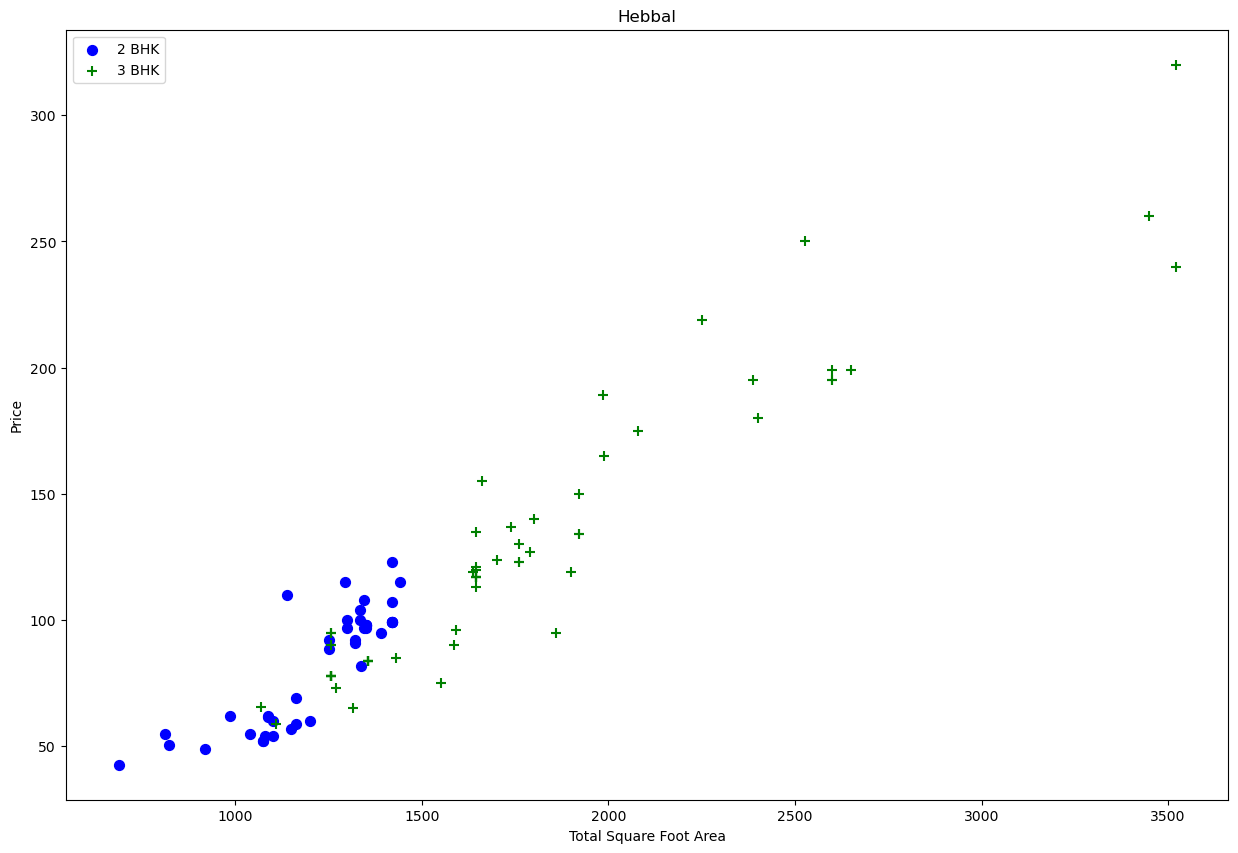

In [41]:
# We are creating a scatter plot for 2bhk and 3bhk houses showing the price and total sq footage for each house in one particular location of our choice
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s=50)
    plt.xlabel("Total Square Foot Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, "Hebbal")

In [42]:
for location, location_df in df.groupby('location'):
    print(location)
    print(location_df)

 Anekal
           area_type   availability location  size society total_sqft  bath  \
2557  Built-up  Area  Ready To Move   Anekal  1 RK     NaN        351   1.0   

      balcony  price  
2557      1.0   16.0  
 Banaswadi
                 area_type   availability    location  size  society  \
8385  Super built-up  Area  Ready To Move   Banaswadi  1 RK  Krntsee   

     total_sqft  bath  balcony  price  
8385        527   1.0      0.0   35.0  
 Basavangudi
                 area_type   availability      location  size society  \
7638  Super built-up  Area  Ready To Move   Basavangudi  1 RK     NaN   

     total_sqft  bath  balcony  price  
7638        670   1.0      1.0   50.0  
 Bhoganhalli
                 area_type availability      location  size  society  \
2486  Super built-up  Area       19-Dec   Bhoganhalli  1 RK  Rosha I   

     total_sqft  bath  balcony  price  
2486        296   1.0      0.0  22.89  
 Devarabeesana Halli
                  area_type   availability          

                  area_type   availability             location       size  \
3903   Super built-up  Area  Ready To Move  4th Block Jayanagar      2 BHK   
5901   Super built-up  Area         19-Dec  4th Block Jayanagar      3 BHK   
7240   Super built-up  Area  Ready To Move  4th Block Jayanagar      3 BHK   
12209            Plot  Area  Ready To Move  4th Block Jayanagar  7 Bedroom   

      society total_sqft  bath  balcony  price  
3903      NaN        900   2.0      1.0   70.0  
5901      NaN       2005   3.0      2.0  240.0  
7240      NaN     1567.2   2.0      0.0  190.0  
12209     NaN       2240   4.0      1.0  700.0  
4th Block Koramangala
                  area_type   availability               location       size  \
1847   Super built-up  Area  Ready To Move  4th Block Koramangala      2 BHK   
3867             Plot  Area  Ready To Move  4th Block Koramangala  4 Bedroom   
4187             Plot  Area  Ready To Move  4th Block Koramangala  4 Bedroom   
4585           Carpet 

Air View Colony
                  area_type   availability         location   size  society  \
12047  Super built-up  Area  Ready To Move  Air View Colony  2 BHK  Myitece   

      total_sqft  bath  balcony  price  
12047       1100   2.0      1.0   58.5  
Aishwarya Crystal Layout
                  area_type   availability                  location   size  \
5467   Super built-up  Area  Ready To Move  Aishwarya Crystal Layout  3 BHK   
11743        Built-up  Area  Ready To Move  Aishwarya Crystal Layout  2 BHK   

       society total_sqft  bath  balcony  price  
5467   GRvasth       2250   3.0      1.0  113.0  
11743  GRvasth       1053   2.0      0.0   51.0  
Akash Nagar
            area_type   availability     location   size society total_sqft  \
10902  Built-up  Area  Ready To Move  Akash Nagar  2 BHK     NaN        967   

       bath  balcony  price  
10902   2.0      1.0   47.8  
Akshaya Nagar
                  area_type   availability       location       size  society  \
121 

           area_type   availability     location   size society total_sqft  \
2734  Built-up  Area  Ready To Move  Banaswadi,   4 BHK     NaN       3161   

      bath  balcony  price  
2734   4.0      3.0  214.0  
Bande Nallasandra
       area_type   availability           location       size  society  \
8822  Plot  Area  Ready To Move  Bande Nallasandra  3 Bedroom  Ceureld   

     total_sqft  bath  balcony  price  
8822       2400   4.0      1.0  130.0  
Bandepalya
                 area_type   availability    location   size  society  \
8501  Super built-up  Area  Ready To Move  Bandepalya  2 BHK  Jaity H   

     total_sqft  bath  balcony  price  
8501       1125   2.0      1.0   48.0  
Banjara Layout
                  area_type   availability        location       size society  \
491              Plot  Area  Ready To Move  Banjara Layout  3 Bedroom     NaN   
1565   Super built-up  Area         18-Aug  Banjara Layout      3 BHK     NaN   
5329             Plot  Area  Ready To Move

Coconut Garden
                  area_type   availability        location       size society  \
1297   Super built-up  Area  Ready To Move  Coconut Garden      3 BHK     NaN   
12441            Plot  Area  Ready To Move  Coconut Garden  3 Bedroom     NaN   

      total_sqft  bath  balcony  price  
1297        1800   3.0      3.0   80.0  
12441        600   3.0      1.0   90.0  
Coconut Grove Layout
                  area_type   availability              location   size  \
7012         Built-up  Area  Ready To Move  Coconut Grove Layout  2 BHK   
7212   Super built-up  Area  Ready To Move  Coconut Grove Layout  2 BHK   
8920   Super built-up  Area  Ready To Move  Coconut Grove Layout  2 BHK   
10798        Built-up  Area  Ready To Move  Coconut Grove Layout  2 BHK   
12409  Super built-up  Area  Ready To Move  Coconut Grove Layout  3 BHK   

       society total_sqft  bath  balcony  price  
7012   Naenti        1007   2.0      2.0   43.0  
7212       NaN       1272   2.0      2.0   51.

                  area_type   availability                location       size  \
59     Super built-up  Area  Ready To Move  Govindaraja Nagar Ward      2 BHK   
10373            Plot  Area  Ready To Move  Govindaraja Nagar Ward  5 Bedroom   

      society total_sqft  bath  balcony  price  
59        NaN        840   2.0      2.0   45.0  
10373     NaN       2600   5.0      3.0  370.0  
Govindpura
                 area_type   availability    location       size  society  \
1928  Super built-up  Area  Ready To Move  Govindpura      3 BHK  Muncy R   
3132  Super built-up  Area         18-Nov  Govindpura      2 BHK      NaN   
5844            Plot  Area  Ready To Move  Govindpura  6 Bedroom      NaN   
7400  Super built-up  Area         18-Nov  Govindpura      3 BHK      NaN   
9250  Super built-up  Area         18-Nov  Govindpura      3 BHK      NaN   

     total_sqft  bath  balcony   price  
1928       1690   3.0      NaN   75.00  
3132       1326   2.0      1.0   62.17  
5844        

Kacharakanahalli
                  area_type   availability          location       size  \
1100             Plot  Area  Ready To Move  Kacharakanahalli  1 Bedroom   
2268   Super built-up  Area  Ready To Move  Kacharakanahalli      2 BHK   
4057         Built-up  Area  Ready To Move  Kacharakanahalli      3 BHK   
6138   Super built-up  Area         18-Apr  Kacharakanahalli      2 BHK   
8342   Super built-up  Area  Ready To Move  Kacharakanahalli      3 BHK   
11264  Super built-up  Area  Ready To Move  Kacharakanahalli      2 BHK   

       society total_sqft  bath  balcony  price  
1100       NaN        750   1.0      0.0  56.25  
2268       NaN       1256   2.0      1.0  60.00  
4057       NaN       1850   3.0      3.0  98.00  
6138       NaN        865   2.0      1.0  35.11  
8342   JPoldGo       1400   3.0      3.0  69.00  
11264      NaN       1256   2.0      1.0  60.00  
Kada Agrahara
                 area_type   availability       location   size  society  \
506   Super built

            area_type   availability                   location       size  \
5321   Built-up  Area         18-Jan  Lal Bahadur Shastri Nagar      2 BHK   
10328      Plot  Area  Ready To Move  Lal Bahadur Shastri Nagar  3 Bedroom   

      society total_sqft  bath  balcony  price  
5321      NaN        856   2.0      1.0   48.0  
10328     NaN       2400   2.0      2.0  185.0  
Lalbagh Road
                 area_type availability      location   size society  \
1855  Super built-up  Area       18-Dec  Lalbagh Road  4 BHK     NaN   

     total_sqft  bath  balcony  price  
1855       3675   4.0      3.0  367.0  
Langford Gardens
                  area_type availability          location   size  society  \
5695   Super built-up  Area       20-Jul  Langford Gardens  3 BHK  Soond R   
12757  Super built-up  Area       20-Apr  Langford Gardens  3 BHK  Soond R   

      total_sqft  bath  balcony  price  
5695     2777.29   5.0      2.0  650.0  
12757    2777.29   5.0      2.0  649.0  
Langf

Maruthi Layout
                 area_type   availability        location   size  society  \
1963  Super built-up  Area  Ready To Move  Maruthi Layout  2 BHK  Prareth   

     total_sqft  bath  balcony  price  
1963        916   2.0      1.0   42.0  
Maruthi Nagar
                  area_type   availability       location        size  \
1607   Super built-up  Area         18-May  Maruthi Nagar       3 BHK   
6811         Built-up  Area  Ready To Move  Maruthi Nagar       2 BHK   
7757         Built-up  Area  Ready To Move  Maruthi Nagar       2 BHK   
9769             Plot  Area  Ready To Move  Maruthi Nagar  10 Bedroom   
11519  Super built-up  Area         18-Aug  Maruthi Nagar       3 BHK   

       society total_sqft  bath  balcony  price  
1607       NaN       1250   3.0      1.0   39.5  
6811       NaN       1158   2.0      3.0   75.0  
7757   PavanSa        850   1.0      0.0   35.5  
9769       NaN       3300   9.0      NaN  450.0  
11519      NaN       1250   3.0      2.0   42.0

                  area_type   availability    location       size  society  \
106          Built-up  Area  Ready To Move  Nagarbhavi      3 BHK      NaN   
417              Plot  Area  Ready To Move  Nagarbhavi  3 Bedroom      NaN   
839              Plot  Area  Ready To Move  Nagarbhavi  2 Bedroom      NaN   
1317   Super built-up  Area  Ready To Move  Nagarbhavi      3 BHK  DSesthr   
1625         Built-up  Area  Ready To Move  Nagarbhavi  3 Bedroom      NaN   
...                     ...            ...         ...        ...      ...   
12658  Super built-up  Area  Ready To Move  Nagarbhavi      2 BHK      NaN   
12743        Built-up  Area  Ready To Move  Nagarbhavi  4 Bedroom      NaN   
12940            Plot  Area  Ready To Move  Nagarbhavi  4 Bedroom      NaN   
13073            Plot  Area  Ready To Move  Nagarbhavi  4 Bedroom      NaN   
13139  Super built-up  Area  Ready To Move  Nagarbhavi      2 BHK      NaN   

      total_sqft  bath  balcony  price  
106         1630   2.0

            area_type   availability         location       size society  \
1383   Built-up  Area  Ready To Move  Sarjapur Road,   3 Bedroom     NaN   
2731   Built-up  Area  Ready To Move  Sarjapur Road,       3 BHK     NaN   
4007   Built-up  Area  Ready To Move  Sarjapur Road,       4 BHK     NaN   
5006   Built-up  Area  Ready To Move  Sarjapur Road,       3 BHK     NaN   
11105  Built-up  Area  Ready To Move  Sarjapur Road,       3 BHK     NaN   
11608  Built-up  Area  Ready To Move  Sarjapur Road,       3 BHK     NaN   
11781  Built-up  Area  Ready To Move  Sarjapur Road,       2 BHK     NaN   
12989  Built-up  Area  Ready To Move  Sarjapur Road,       2 BHK     NaN   

      total_sqft  bath  balcony  price  
1383        3329   3.0      2.0  330.0  
2731        1929   3.0      2.0  115.0  
4007        2425   4.0      3.0  173.0  
5006        1636   3.0      2.0   97.0  
11105       1936   3.0      2.0  139.0  
11608       1700   3.0      2.0   74.0  
11781       1275   2.0      

                  area_type   availability     location       size  society  \
624    Super built-up  Area  Ready To Move  Tumkur Road      3 BHK  SosonGa   
799    Super built-up  Area  Ready To Move  Tumkur Road      3 BHK  Soite E   
1263   Super built-up  Area         21-Jan  Tumkur Road      3 BHK  Sapus S   
1754   Super built-up  Area  Ready To Move  Tumkur Road      2 BHK      NaN   
1943   Super built-up  Area  Ready To Move  Tumkur Road      3 BHK  Sahtsva   
2298   Super built-up  Area  Ready To Move  Tumkur Road      3 BHK  Sahtsva   
2587   Super built-up  Area         21-Jun  Tumkur Road      1 BHK  Coowsri   
2590   Super built-up  Area         21-Jan  Tumkur Road      2 BHK  Sapus S   
2651   Super built-up  Area         21-Jan  Tumkur Road      2 BHK  Sapus S   
3890   Super built-up  Area         21-Jun  Tumkur Road      3 BHK  Coowsri   
4122   Super built-up  Area         21-Jun  Tumkur Road      2 BHK  Coowsri   
4206   Super built-up  Area  Ready To Move  Tumkur R

                  area_type   availability     location       size  society  \
183    Super built-up  Area         21-Jun  Vijayanagar      3 BHK  Saahaat   
237    Super built-up  Area         21-Jun  Vijayanagar      3 BHK  Saityat   
261    Super built-up  Area  Ready To Move  Vijayanagar      3 BHK  JJortom   
303    Super built-up  Area  Ready To Move  Vijayanagar      3 BHK  Swadeh    
387          Built-up  Area  Ready To Move  Vijayanagar      3 BHK      NaN   
388    Super built-up  Area         21-Jun  Vijayanagar      3 BHK  Saityat   
857              Plot  Area  Ready To Move  Vijayanagar  8 Bedroom      NaN   
1360   Super built-up  Area         21-Jun  Vijayanagar      3 BHK  Saityat   
1543   Super built-up  Area         21-Jun  Vijayanagar      3 BHK  Saahaat   
1994   Super built-up  Area         20-Jun  Vijayanagar      2 BHK  Saityat   
2464             Plot  Area  Ready To Move  Vijayanagar  6 Bedroom      NaN   
2838   Super built-up  Area         21-Jun  Vijayana

                  area_type   availability        location       size  \
842    Super built-up  Area  Ready To Move  Yelachenahalli      3 BHK   
1059   Super built-up  Area  Ready To Move  Yelachenahalli      3 BHK   
1576   Super built-up  Area         16-Dec  Yelachenahalli      2 BHK   
1870         Built-up  Area  Ready To Move  Yelachenahalli  4 Bedroom   
1987   Super built-up  Area  Ready To Move  Yelachenahalli      3 BHK   
2930   Super built-up  Area  Ready To Move  Yelachenahalli      2 BHK   
3629   Super built-up  Area  Ready To Move  Yelachenahalli      2 BHK   
4019             Plot  Area  Ready To Move  Yelachenahalli  5 Bedroom   
4157   Super built-up  Area  Ready To Move  Yelachenahalli      2 BHK   
4828             Plot  Area  Ready To Move  Yelachenahalli  4 Bedroom   
4983   Super built-up  Area         18-Aug  Yelachenahalli      2 BHK   
6553   Super built-up  Area  Ready To Move  Yelachenahalli      3 BHK   
6812   Super built-up  Area  Ready To Move  Yelache

We should remove properties where for the same location, the price per sq foot of (for example) 3 bhk apartment is less than 2 bhk apartment(for same square feet area) 

In [43]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([]) # creating an empty array named 'exclude_indices' to later store rows to delete
    for location, location_df in df.groupby('location'): # this code is written in order to get two things: 1. a particular location 2. all properties of that locations in dataframe format 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): # this code is for getting: 1. a particular bhk(say 1 bhk) 2. dataframe for all the properties of that bhk
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0] # this counts the number of rows (or the total number of all properties) in 1 type of bhk
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1) # stats of 1 less bhk to current bhk are stored in stats variable
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
                
df7 = remove_bhk_outliers(df6)         
df7.shape    

(7329, 7)

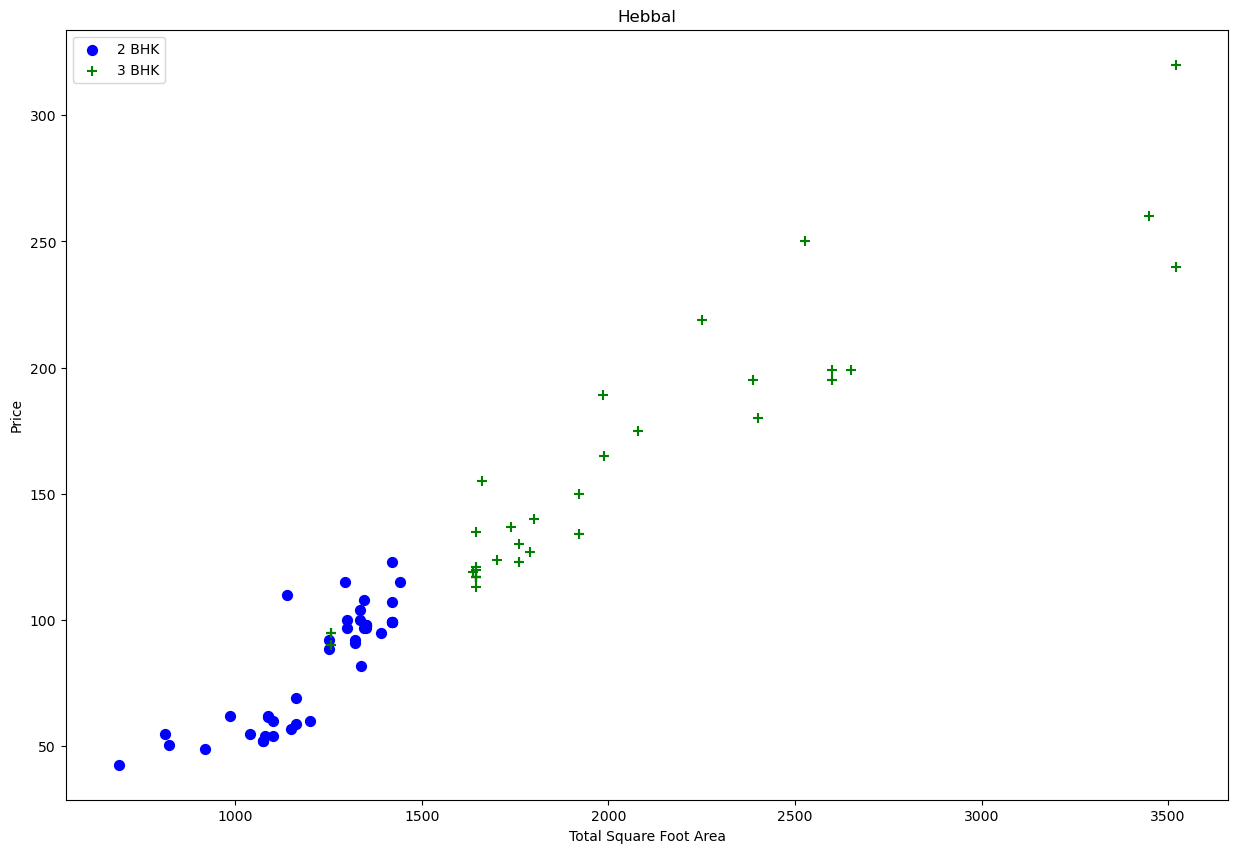

In [44]:
plot_scatter_chart(df7, "Hebbal") # this gives the revised plot of 2 bhk and 3 bhk properties with outliers removed from the previous code

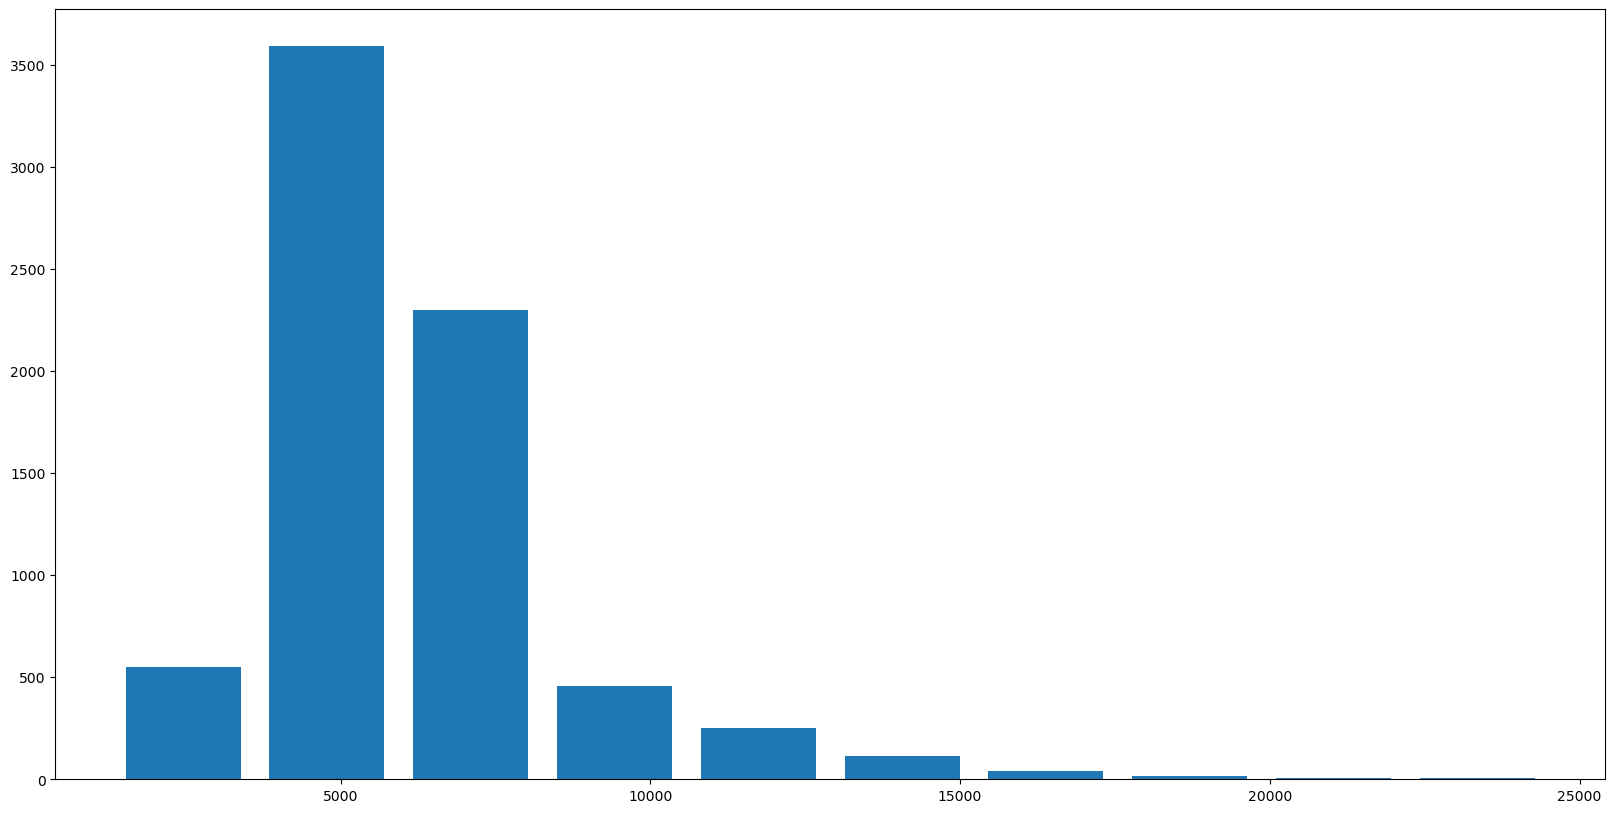

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel = ("Price per square feet")
plt.ylabel = ("Count")

We see from the above graph that majority of properties lie within 10,000 price per sq foot area

In [46]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [47]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


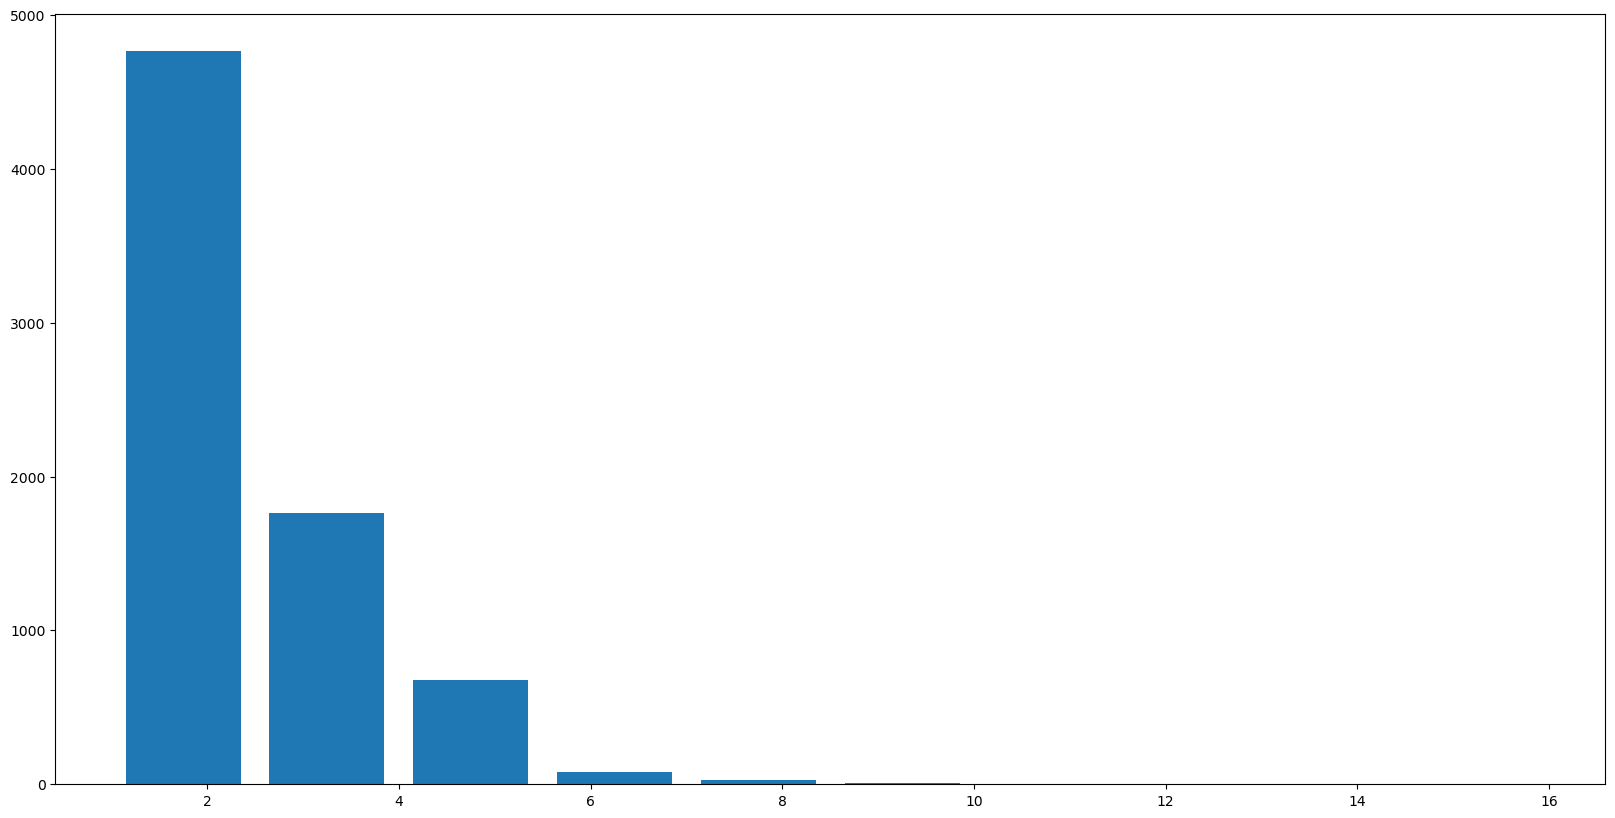

In [48]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel = ("Number of Bathrooms")
plt.ylabel = ("Count")

In [49]:
# We are removing those properties where the number of bathrooms are greater that the number of bedrooms by 2.
df7[df7.bath > df7.bhk+2]
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [50]:
df8= df7[df7.bath < df7.bhk+2]
df8.shape

(7251, 7)

In [51]:
# we are dropping the feature 'size' as its giving the same values as given under 'bhk'. We are dropping the feature 'price_per_sqft' as we just needed it to remove outliers.
df9 = df8.drop(['size' , 'price_per_sqft'], axis= 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [52]:
# we are doing one-hot encoding for the 'location' column
dummies = pd.get_dummies(df9.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


we are dropping one column (here 'other' location):
because in one-hot encoding, one feature (column) in a dataset can be perfectly predicted using other features.
example: 
Red	Blue Green	
1	 0	   0	
0	 1	   0	
0	 0	   1
here, 'Green' can always be predicted without exclusively needing the green column. whenever red and blue, both are 0, it means the color is green

benefit of removing one column:
1. Eliminates multicollinearity (dummy variable trap).
2. Retains all the information because the dropped column can be deduced.
3. Improves computational efficiency.

In [53]:
df10 = pd.concat([df9, dummies.drop('other', axis='columns')], axis= 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# we can original 'location' column as it already one-hot encoded  
df11 = df10.drop('location', axis = 'columns')
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11.shape

(7251, 245)

# Separating the target column:

In [56]:
x = df11.drop('price', axis = 'columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Train-Test Split:

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1 )

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(xtrain, ytrain)
lr_clf.score(xtest, ytest)

0.8494788916419451

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),            
            'params': {
                 'fit_intercept': [True, False]
           }
        },
        
        'lasso' : {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [101]:
#find_best_model_using_gridsearchcv(x, y)
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.819001,{'fit_intercept': False}
1,lasso,0.687473,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.714309,"{'criterion': 'squared_error', 'splitter': 'be..."


In [102]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [119]:
def predictPrice(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0] #np.where(x.columns == location): Finds the index of the column matching the given location;  [0][0]: Extracts the first match (location index).
    
    X = np.zeros(len(x.columns)) #Creates an array X filled with zeros.The size of the array matches the number of columns (features) in x.
    X[0] = sqft
    X[1] = bath
    X[2] = bhk #If sqft = 1000, bath = 2, and bhk = 2, then:X = [1000, 2, 2, 0, 0].
    if loc_index >= 0: #If the location exists in x.columns, set its corresponding index in X to 1. This is one-hot encoding for locations: Only the specified location column is set to 1, and the others remain 0.
        X[loc_index] = 1
    X_df = pd.DataFrame([X], columns=x.columns) #Convert to DataFrame with column names
    return lr_clf.predict(X_df)[0]

In [120]:
predictPrice('1st Phase JP Nagar', 1000, 2, 2)

87.73026323717367

In [124]:
predictPrice('1st Phase JP Nagar', 1000, 2, 3)

86.71425687893931

In [122]:
predictPrice('Indira Nagar', 1000, 2, 2)

175.81384049142022

In [123]:
predictPrice('Indira Nagar', 1000, 3, 3)

177.3697085386104

In [125]:
import pickle
with open('Bengaluru_houses_price_prediction_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [126]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))